In [26]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime
import matplotlib.pyplot as plt

In [47]:
def load_forces(forces):
    df_streets = dict()
    df_outcomes = dict()
    df_stop_and_search = dict()
    
    for force in forces:
        file_path_streets = './Data/force_data/' + force + '_street.csv'
        file_path_outcomes = './Data/force_data/' + force + '_outcomes.csv'
        file_path_stop_and_search = './Data/force_data/' + force + '_stop_and_search.csv'
        
        df_streets[force] = pd.read_csv(file_path_streets, low_memory=False)
        df_outcomes[force] = pd.read_csv(file_path_outcomes, low_memory=False)
        df_stop_and_search[force] = pd.read_csv(file_path_stop_and_search, low_memory=False)
        
        df_stop_and_search[force]['Datetime'] = pd.to_datetime(df_stop_and_search[force]['Date'])
        df_stop_and_search[force]['Date'] = df_stop_and_search[force]['Datetime'].dt.date
    
    return df_streets, df_outcomes, df_stop_and_search

In [48]:
forces = ['city-of-london', 'metropolitan', 'surrey', 'hertfordshire',
          'thames-valley', 'essex', 'kent', 'hampshire', 'bedfordshire']
df_streets, df_outcomes, df_stop_and_search = load_forces(forces)

In [37]:
df_streets['city-of-london'].head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Vehicle crime,NaN,NaN
1,1,NaN,2010-12,City of London Police,City of London Police,-0.114940,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Other crime,NaN,NaN
2,2,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
3,3,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
4,4,NaN,2010-12,City of London Police,City of London Police,-0.125742,51.516368,On or near Grape Street,E01000919,Camden 028D,Anti-social behaviour,NaN,NaN


In [38]:
df_streets['metropolitan'].shape, df_outcomes['metropolitan'].shape, df_stop_and_search['metropolitan'].shape

((11625548, 13), (5820841, 11), (1310977, 16))

<AxesSubplot:>

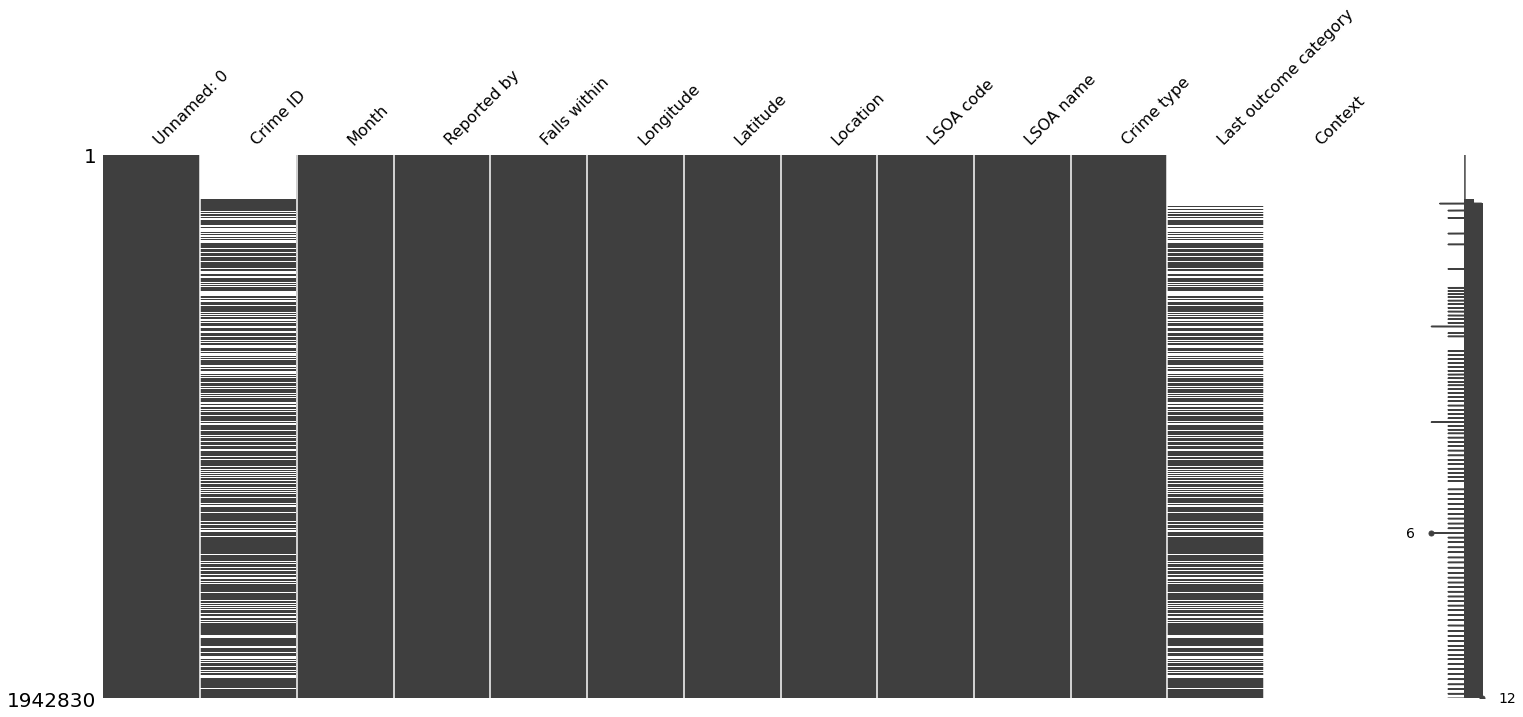

In [39]:
msno.matrix(df_streets['essex'])

In [49]:
def plot_forces_streets(df, forces=[]):
    df_months = dict()
    plt.figure(figsize=(16, 8), dpi=150)
    
    if forces == []:
        for key in df:
            df_months[key] = df[key]['Month'].value_counts()
            df_months[key].sort_index(inplace=True)
            df_months[key].plot(label=key)
    else:
        for force in forces:
            df_months[force] = df[force]['Month'].value_counts()
            df_months[force].sort_index(inplace=True)
            df_months[force].plot(label=force)

    plt.ylabel('Number of incidents')
    plt.xlabel('Months')
    plt.legend()

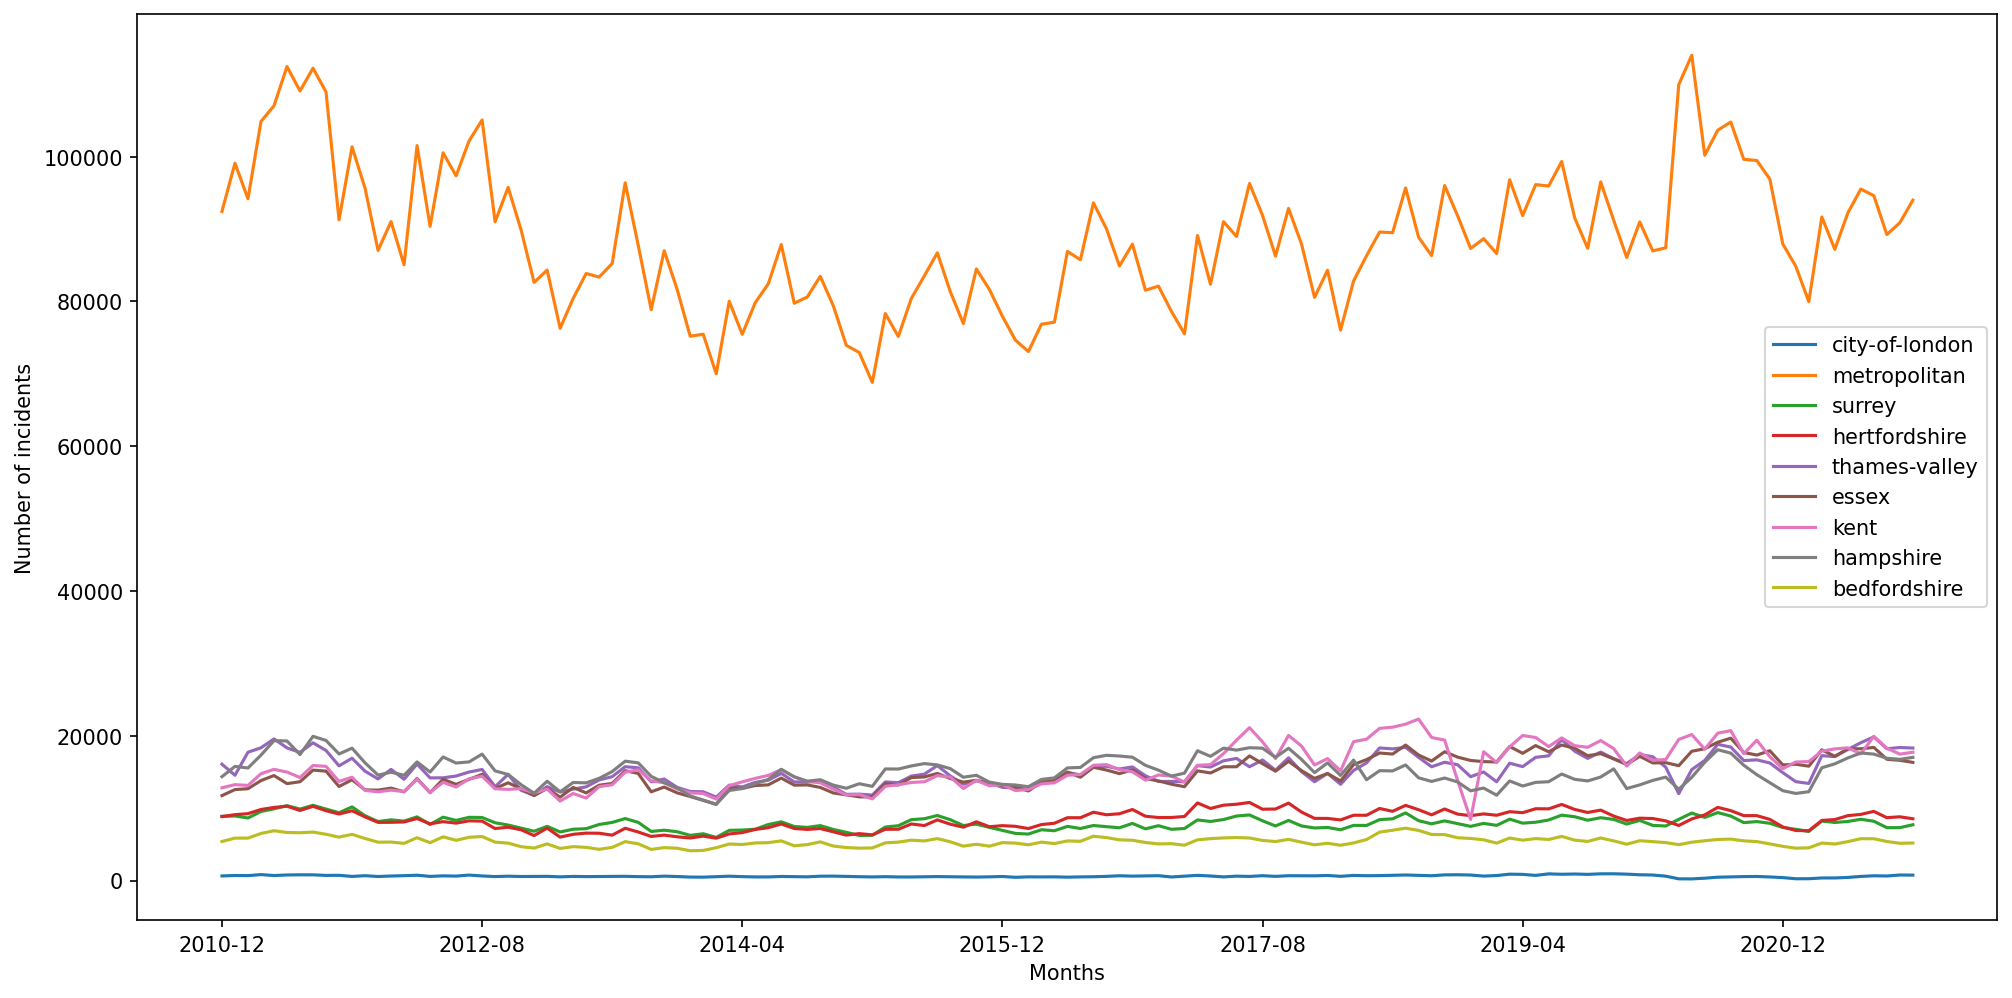

In [50]:
plot_forces_streets(df_streets)

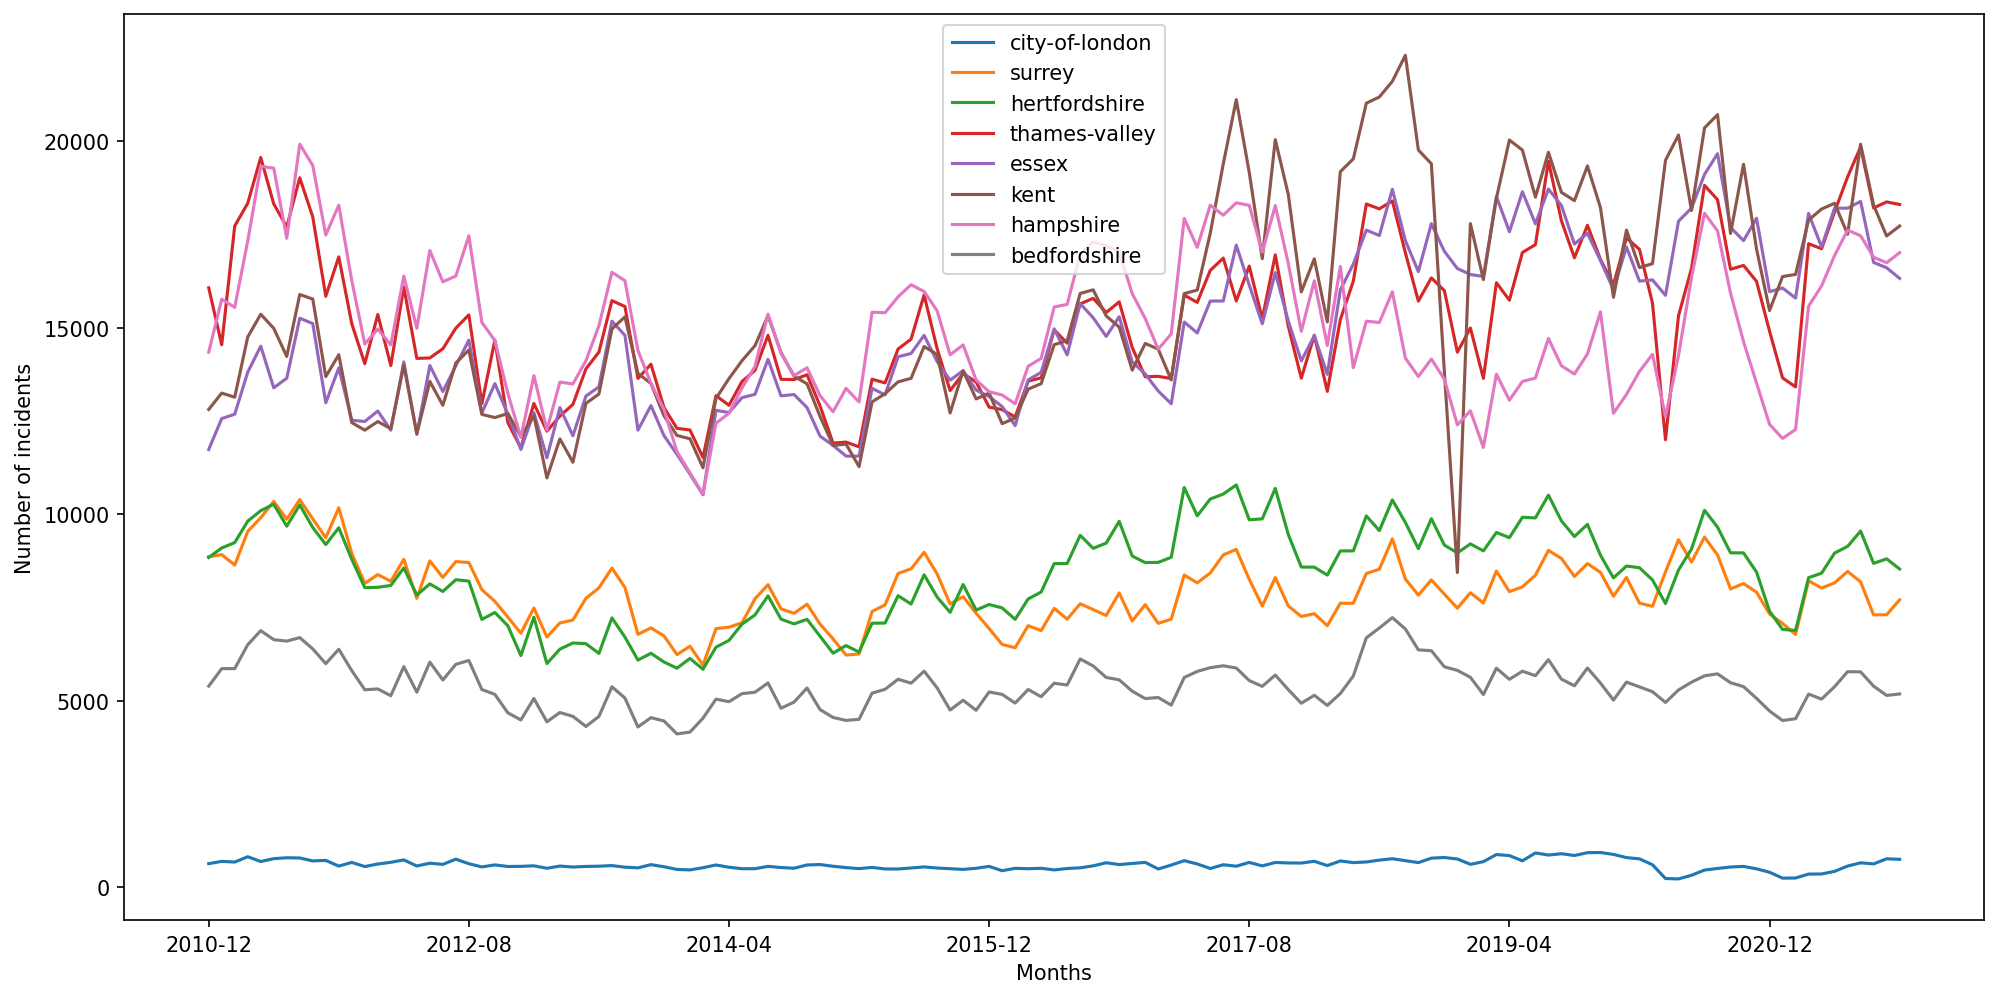

In [51]:
forces = ['city-of-london', 'surrey', 'hertfordshire',
          'thames-valley', 'essex', 'kent', 'hampshire', 'bedfordshire']
plot_forces_streets(df_streets, forces)

In [58]:
def plot_forces_sas(df, forces = []):
    df_dates = dict()
    plt.figure(figsize=(16, 8), dpi=150)
    
    if forces == []:
        for key in df:
            df_dates[key] = df[key]['Date'].value_counts()
            df_dates[key].sort_index(inplace=True)
            df_dates[key].plot(label=key)
    else:
        for force in forces:
            df_dates[force] = df[force]['Date'].value_counts()
            df_dates[force].sort_index(inplace=True)
            df_dates[force].plot(label=force)

    plt.ylabel('Number of stop and searches')
    plt.xlabel('Months')
    plt.legend()

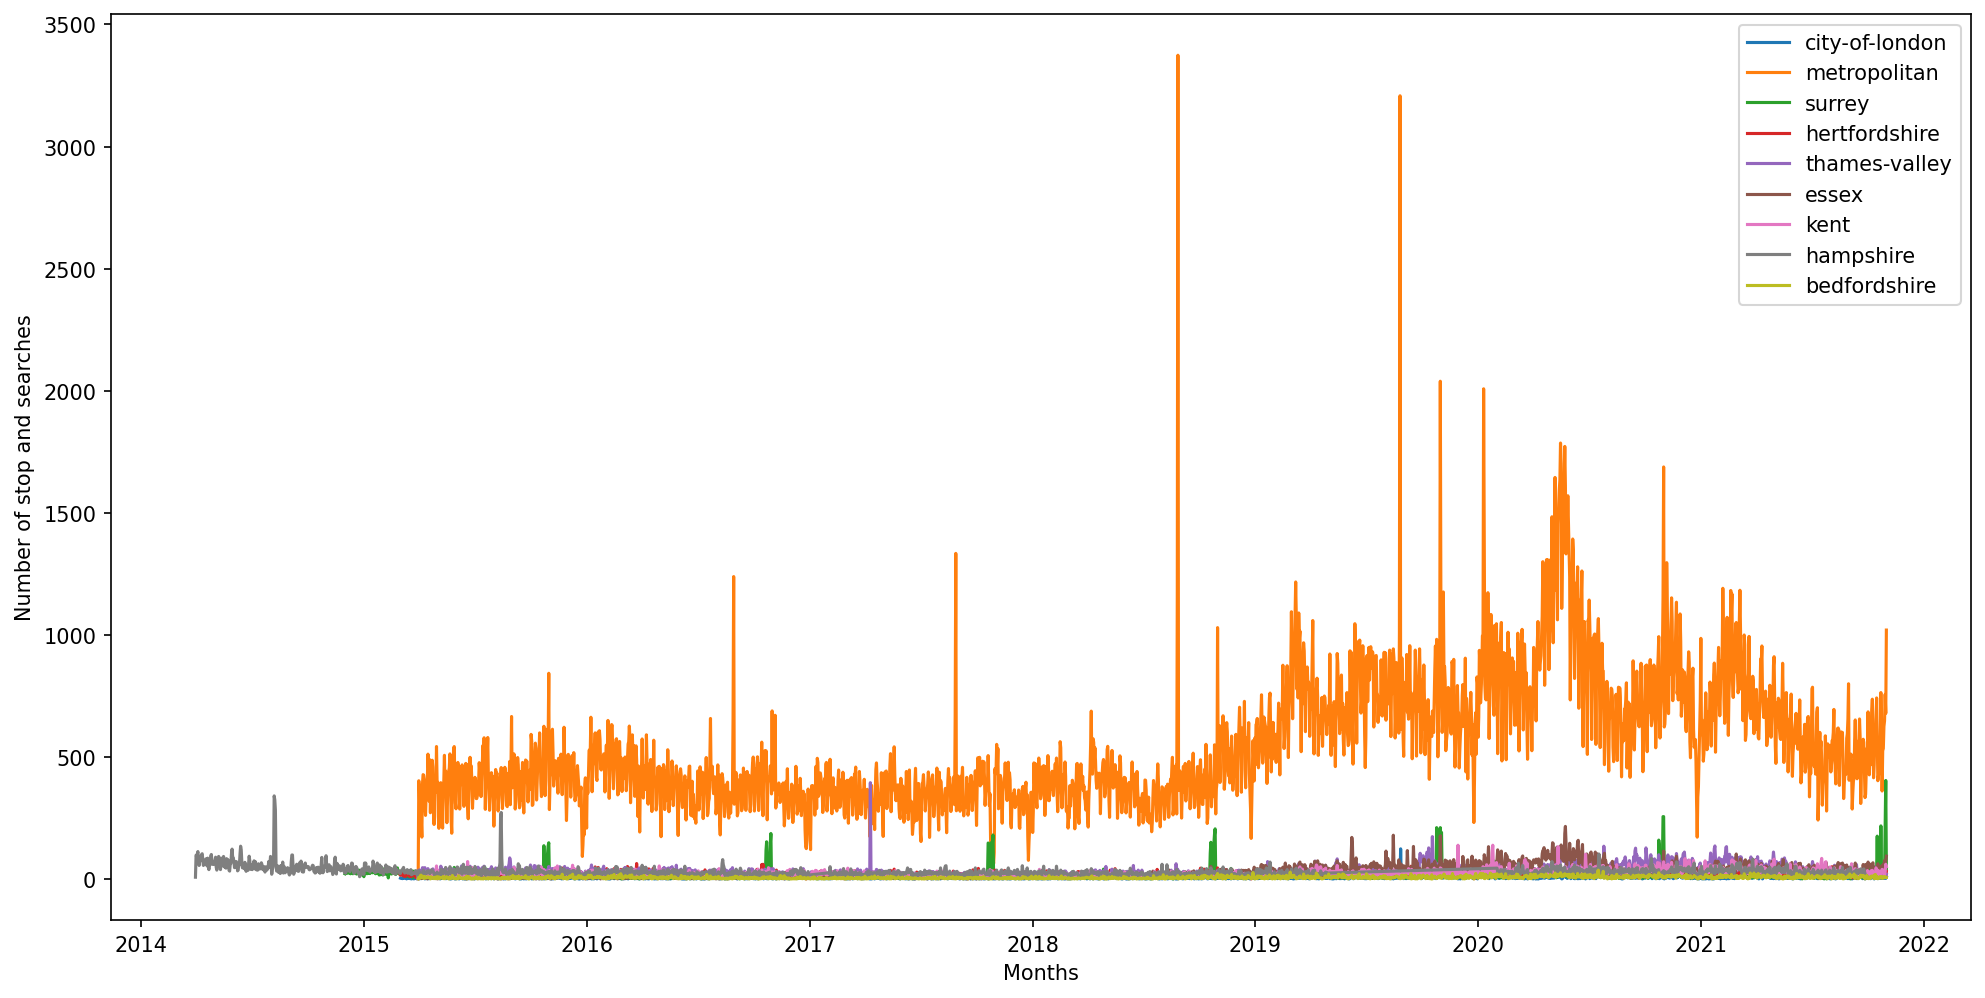

In [62]:
plot_forces_sas(df_stop_and_search)

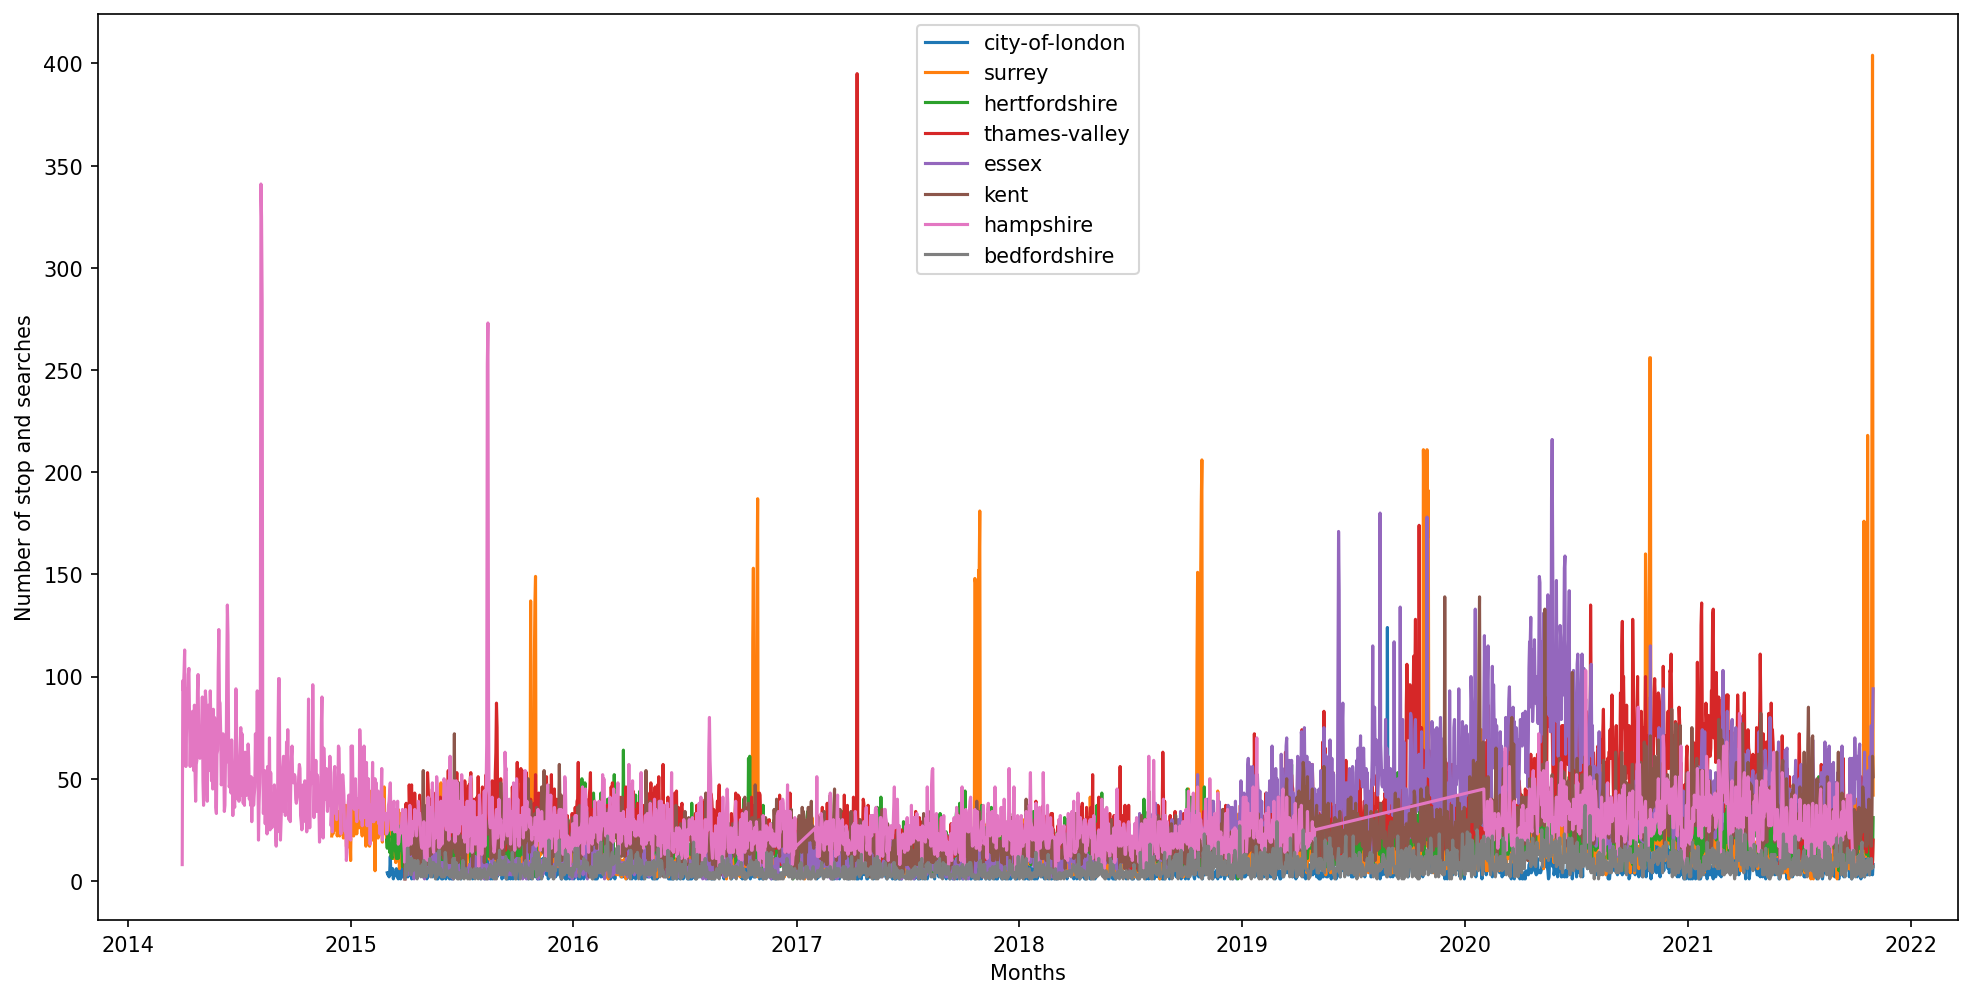

In [61]:
forces = ['city-of-london', 'surrey', 'hertfordshire',
          'thames-valley', 'essex', 'kent', 'hampshire', 'bedfordshire']
plot_forces_sas(df_stop_and_search, forces)